# **AS03: Similaridade Textual**
Esta é a tarefa AS03: Similaridade Textual, uma atividade prática que estimula o aluno a absorver conceitos básicos de mineração e análise de texto.

### **Libraries**

In [1]:
import pandas as pd
import numpy as np
import spacy
import sklearn
import nltk
import unicodedata
import re
import scipy.sparse as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
from collections import Counter
import itertools

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk.tokenize as tokenizer

from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import cosine_similarity, manhattan_distances, euclidean_distances
from scipy.spatial.distance import jaccard, minkowski
from math import exp

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
stopwords = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **Get and Save Data**

In [2]:
# Get Data
file_path = '../datasets/headlines.txt'

with open(file_path, 'r') as file:
    headlines = file.readlines()

# Removendo espaços em branco e quebras de linha
headlines = [line.strip() for line in headlines if line.strip()]

df = pd.DataFrame()
df['text'] = headlines
df.to_csv("headline.csv", index=False)

df

,text
0,Investors unfazed by correction as crypto fund...
1,"Bitcoin, Ethereum prices continue descent, but..."
2,The surge in euro area inflation during the pa...
3,Inflation: why it's temporary and raising inte...
4,Will Cryptocurrency Protect Against Inflation?
5,Tweed is a crypto wallet API to add a web3 fla...
6,Who Created Bitcoin? Learn About The Biggest C...
7,"Cryptocurrency Prices And News: Bitcoin, Crypt..."
8,"Silvergate Capital To Shut Down, Liquidate Cry..."
9,Dow Jones Rises On Surprise Jump In Jobless Cl...


### **Load Data**

In [3]:
df = pd.read_csv("headline.csv")
df

,text
0,Investors unfazed by correction as crypto fund...
1,"Bitcoin, Ethereum prices continue descent, but..."
2,The surge in euro area inflation during the pa...
3,Inflation: why it's temporary and raising inte...
4,Will Cryptocurrency Protect Against Inflation?
5,Tweed is a crypto wallet API to add a web3 fla...
6,Who Created Bitcoin? Learn About The Biggest C...
7,"Cryptocurrency Prices And News: Bitcoin, Crypt..."
8,"Silvergate Capital To Shut Down, Liquidate Cry..."
9,Dow Jones Rises On Surprise Jump In Jobless Cl...


### **Preprocessing Text**

In [4]:
# Normalization
def normalization(text):
    # Lower case
    lower_text = text.lower()
    
    # Remove accents
    nfkd_form = unicodedata.normalize('NFKD', lower_text)
    ascii_text =  "".join([c for c in nfkd_form if not unicodedata.combining(c)])
    
    # Acronym normalization
    text_acronym = re.sub('\.(?!(\S[^. ])|\d)', '', ascii_text)
    
    # Remove \n
    text_acronym = text_acronym.replace("\n", " ")
    
    # Ponctuation remove
    text_pontuation = re.sub(r"(?<!\$\d)(?<!\£\d)(?<![0-9])([.,;?!()\[\]{}<>/\\|@#%^&*+=:\"'])", '', text_acronym)
    text_pontuation
    
    # Special character remove
    text_special_char = re.sub('(?<!\d)[.,:!?\'\(\)#:-](?!\d)', '', text_pontuation) # special character removal
    text_special_char = re.sub(' +', ' ', text_special_char) # extra spaces removal
    
    return text_special_char

# StopWords remove
def stop_words_function(text):
    return [word for word in text if word not in stopwords]

# Lemmatization
def lemmatization(text):
    return [lemmatizer.lemmatize(word) for word in text]

# Stemming
def steamming(text):
    return [stemmer.stem(word) for word in text]

In [5]:
# Apply all functions to preprocess text
df['text_normalized'] = df['text'].apply(normalization)
df['text_tokenized'] = df['text_normalized'].apply(tokenizer.word_tokenize)
df['text_stopwords'] = df['text_tokenized'].apply(stop_words_function)
df['text_lemmatized'] = df['text_stopwords'].apply(stop_words_function)
df['text_stemmed'] = df['text_lemmatized'].apply(stop_words_function)
df['text_to_string'] = df['text_stemmed'].apply(' '.join)
df

,text,text_normalized,text_tokenized,text_stopwords,text_lemmatized,text_stemmed,text_to_string
0,Investors unfazed by correction as crypto fund...,investors unfazed by correction as crypto fund...,"[investors, unfazed, by, correction, as, crypt...","[investors, unfazed, correction, crypto, funds...","[investors, unfazed, correction, crypto, funds...","[investors, unfazed, correction, crypto, funds...",investors unfazed correction crypto funds see ...
1,"Bitcoin, Ethereum prices continue descent, but...",bitcoin ethereum prices continue descent but c...,"[bitcoin, ethereum, prices, continue, descent,...","[bitcoin, ethereum, prices, continue, descent,...","[bitcoin, ethereum, prices, continue, descent,...","[bitcoin, ethereum, prices, continue, descent,...",bitcoin ethereum prices continue descent crypt...
2,The surge in euro area inflation during the pa...,the surge in euro area inflation during the pa...,"[the, surge, in, euro, area, inflation, during...","[surge, euro, area, inflation, pandemic, trans...","[surge, euro, area, inflation, pandemic, trans...","[surge, euro, area, inflation, pandemic, trans...",surge euro area inflation pandemic transitory ...
3,Inflation: why it's temporary and raising inte...,inflation why its temporary and raising intere...,"[inflation, why, its, temporary, and, raising,...","[inflation, temporary, raising, interest, rate...","[inflation, temporary, raising, interest, rate...","[inflation, temporary, raising, interest, rate...",inflation temporary raising interest rates har...
4,Will Cryptocurrency Protect Against Inflation?,will cryptocurrency protect against inflation,"[will, cryptocurrency, protect, against, infla...","[cryptocurrency, protect, inflation]","[cryptocurrency, protect, inflation]","[cryptocurrency, protect, inflation]",cryptocurrency protect inflation
5,Tweed is a crypto wallet API to add a web3 fla...,tweed is a crypto wallet api to add a web3 fla...,"[tweed, is, a, crypto, wallet, api, to, add, a...","[tweed, crypto, wallet, api, add, web3, flavor...","[tweed, crypto, wallet, api, add, web3, flavor...","[tweed, crypto, wallet, api, add, web3, flavor...",tweed crypto wallet api add web3 flavor web se...
6,Who Created Bitcoin? Learn About The Biggest C...,who created bitcoin learn about the biggest cr...,"[who, created, bitcoin, learn, about, the, big...","[created, bitcoin, learn, biggest, cryptos, in...","[created, bitcoin, learn, biggest, cryptos, in...","[created, bitcoin, learn, biggest, cryptos, in...",created bitcoin learn biggest cryptos includin...
7,"Cryptocurrency Prices And News: Bitcoin, Crypt...",cryptocurrency prices and news bitcoin cryptos...,"[cryptocurrency, prices, and, news, bitcoin, c...","[cryptocurrency, prices, news, bitcoin, crypto...","[cryptocurrency, prices, news, bitcoin, crypto...","[cryptocurrency, prices, news, bitcoin, crypto...",cryptocurrency prices news bitcoin cryptos fal...
8,"Silvergate Capital To Shut Down, Liquidate Cry...",silvergate capital to shut down liquidate cryp...,"[silvergate, capital, to, shut, down, liquidat...","[silvergate, capital, shut, liquidate, cryptof...","[silvergate, capital, shut, liquidate, cryptof...","[silvergate, capital, shut, liquidate, cryptof...",silvergate capital shut liquidate cryptofriend...
9,Dow Jones Rises On Surprise Jump In Jobless Cl...,dow jones rises on surprise jump in jobless cl...,"[dow, jones, rises, on, surprise, jump, in, jo...","[dow, jones, rises, surprise, jump, jobless, c...","[dow, jones, rises, surprise, jump, jobless, c...","[dow, jones, rises, surprise, jump, jobless, c...",dow jones rises surprise jump jobless claims b...


In [6]:
text = df['text_to_string'].tolist()
text

['investors unfazed correction crypto funds see $ 154 million inflows',
 'bitcoin ethereum prices continue descent crypto funds see inflows',
 'surge euro area inflation pandemic transitory upside risks',
 'inflation temporary raising interest rates harm good',
 'cryptocurrency protect inflation',
 'tweed crypto wallet api add web3 flavor web service',
 'created bitcoin learn biggest cryptos including dogecoin big eyes coin',
 'cryptocurrency prices news bitcoin cryptos fall silvergate bank liquidation news',
 'silvergate capital shut liquidate cryptofriendly silvergate bank',
 'dow jones rises surprise jump jobless claims bitcoin drops crypto bank silvergate crashes 40 %']

### **Auxiliary Functions**

In [9]:
# Função para criar mapas de calor
def create_heatmap(data, title, xlabel, ylabel):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=xlabel, yticklabels=ylabel)
    plt.title(title)
    plt.show()
    
# Transformar a distância em similaridade
def distance_to_similarity(distance):
    return 1 / exp(distance)
    
# Função para calcular a similaridade de Jaccard para todos os pares de documentos
def jaccard_similarity(matrix, average='binary'):
    similarity = np.zeros((len(matrix), len(matrix)))
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if i != j:
                similarity[i][j] = jaccard_score(matrix[i], matrix[j], average=average)
            else:
                similarity[i][j] = 1.0  # a similaridade de um documento com ele mesmo é 1
    return similarity

# Função para calcular várias métricas de similaridade/dissimilaridade
def calculate_similarity(matrix, metric='euclidean'):
    if metric == 'manhattan':
        # Calculando a distância de Manhattan e convertendo em similaridade
        distance = manhattan_distances(matrix)
        similarity = 1 / (1 + distance)
    elif metric == 'euclidean':
        # Calculando a distância euclidiana e convertendo em similaridade
        distance = euclidean_distances(matrix)
        similarity = 1 / (1 + distance)
    elif metric == 'minkowski':
        # Calculando a distância de Minkowski com p=3 e convertendo em similaridade
        distance = np.zeros((len(matrix), len(matrix)))
        for i in range(len(matrix)):
            for j in range(len(matrix)):
                distance[i][j] = minkowski(matrix[i], matrix[j], 3)
        similarity = 1 / (1 + distance)
    elif metric == 'cosine':
        # Calculando a similaridade do cosseno
        similarity = cosine_similarity(matrix)
    else:
        raise ValueError(f"Metric '{metric}' not recognized")
    return similarity

# Create subplot with 5 heatmaps
def create_subplot_heatmaps(data_list, title_list, xlabel, ylabel):
    # Criando subplots
    fig, axes = plt.subplots(nrows=1, ncols=len(data_list), figsize=(30, 5))
    
    for i, data in enumerate(data_list):
        # Criando heatmap para cada conjunto de dados
        sns.heatmap(data, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=xlabel, yticklabels=ylabel, ax=axes[i])
        axes[i].set_title(title_list[i])
    
    # Ajustando o layout
    plt.tight_layout()
    plt.show()
    
# Construir matriz de co-occurrence
def co_occurrence(text, window_size):
    # Tokenização dos documentos
    tokenized_text = [doc.lower().split() for doc in text]

    # Construindo o vocabulário
    vocabulary = {word for doc in tokenized_text for word in doc}
    vocabulary = sorted(vocabulary)
    vocab_index = {word: i for i, word in enumerate(vocabulary)}

    # Função para calcular a co-ocorrência
    def calculate_co_occurrence(doc, vocab_index, window_size):
        vector = np.zeros(len(vocab_index))
        for i, word in enumerate(doc):
            word_index = vocab_index[word]
            context_indices = list(range(max(0, i - window_size), i)) + \
                            list(range(i + 1, min(len(doc), i + window_size + 1)))

            for j in context_indices:
                co_word = doc[j]
                co_word_index = vocab_index[co_word]
                vector[co_word_index] += 1
                
        return vector

    # Calculando os vetores de co-ocorrência para cada documento
    return np.vstack([calculate_co_occurrence(doc, vocab_index, window_size) for doc in tokenized_text])

### **One-Hot Encoding**

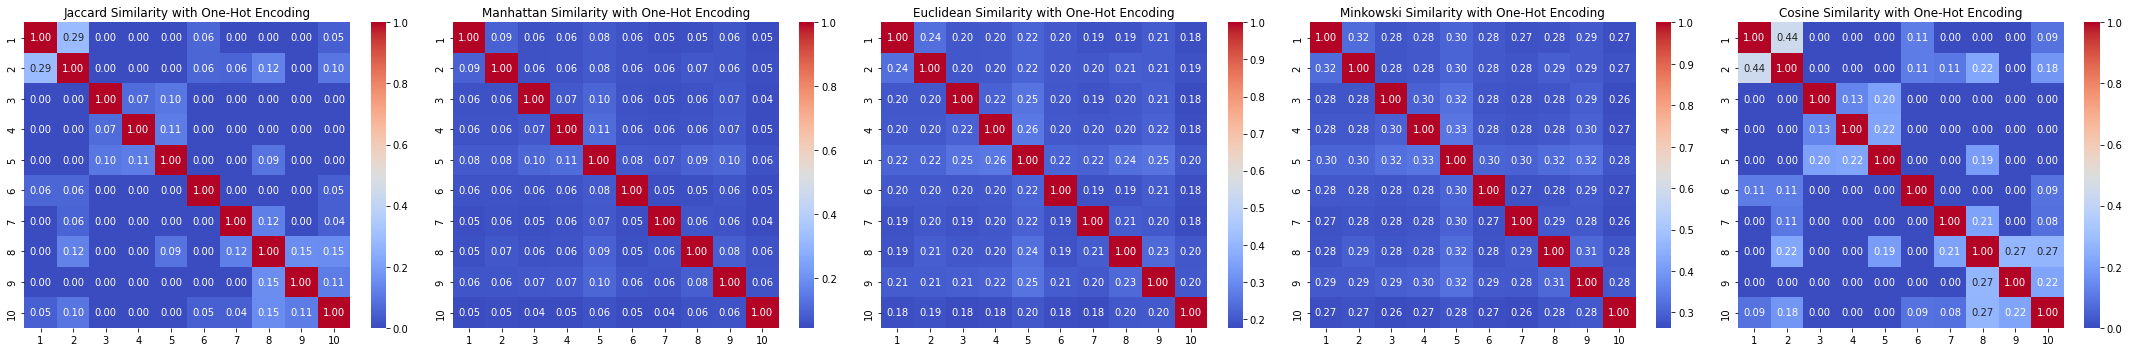

In [10]:
# Using vectorize with binary to represent One-Hot encoding
vectorizer = CountVectorizer(binary=True)
one_hot_encoded = vectorizer.fit_transform(text).toarray()

# Calculando a similaridade de Jaccard para vetores One-Hot Encoding
jaccard_one_hot = jaccard_similarity(one_hot_encoded, 'binary')

# Calculando a similaridade de Manhattan para vetores One-Hot Encoding
manhattan_one_hot = calculate_similarity(one_hot_encoded, 'manhattan')

# Calculando a similaridade euclidiana para vetores One-Hot Encoding
euclidean_one_hot = calculate_similarity(one_hot_encoded, 'euclidean')

# Calculando a similaridade de Minkowski para vetores One-Hot Encoding
minkowski_one_hot = calculate_similarity(one_hot_encoded, 'minkowski')

# Calculando a similaridade do cosseno para vetores One-Hot Encoding
cosine_one_hot = calculate_similarity(one_hot_encoded, 'cosine')

# Dados e títulos para os mapas de calor
data_heatmaps = [
    jaccard_one_hot,
    manhattan_one_hot,
    euclidean_one_hot,
    minkowski_one_hot,
    cosine_one_hot
]

titles_heatmaps = [
    'Jaccard Similarity with One-Hot Encoding',
    'Manhattan Similarity with One-Hot Encoding',
    'Euclidean Similarity with One-Hot Encoding',
    'Minkowski Similarity with One-Hot Encoding',
    'Cosine Similarity with One-Hot Encoding'
]

# Chamando a função para criar múltiplos mapas de calor em uma linha
create_subplot_heatmaps(data_heatmaps, titles_heatmaps, range(1, 11), range(1, 11))

### **Count Vectors**

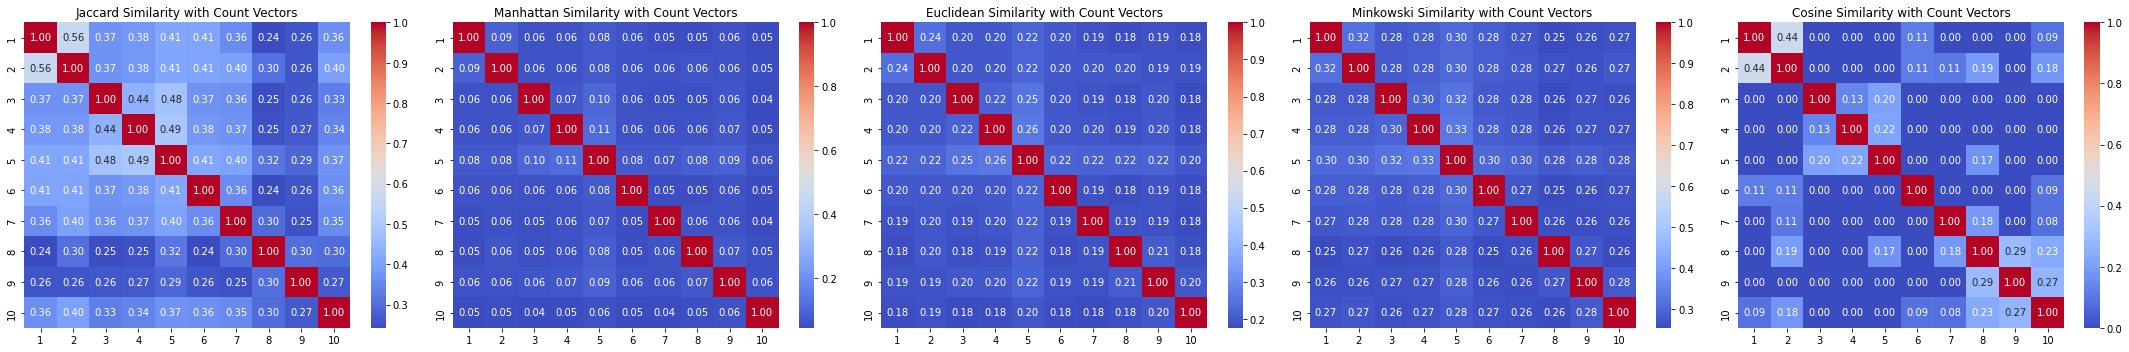

In [11]:
# Using vectorize with binary to represent Count Vectors
vectorizer = CountVectorizer()
count_vectors = vectorizer.fit_transform(text).toarray()

# Calculando a similaridade de Jaccard para vetores Count Vectors
jaccard_count_vectors = jaccard_similarity(count_vectors, 'macro')

# Calculando a similaridade de Manhattan para vetores Count Vectors
manhattan_count_vectors = calculate_similarity(count_vectors, 'manhattan')

# Calculando a similaridade euclidiana para vetores Count Vectors
euclidean_count_vectors = calculate_similarity(count_vectors, 'euclidean')

# Calculando a similaridade de Minkowski para vetores Count Vectors
minkowski_count_vectors = calculate_similarity(count_vectors, 'minkowski')

# Calculando a similaridade do cosseno para vetores Count Vectors
cosine_count_vectors = calculate_similarity(count_vectors, 'cosine')

# Dados e títulos para os mapas de calor
data_heatmaps = [
    jaccard_count_vectors,
    manhattan_count_vectors,
    euclidean_count_vectors,
    minkowski_count_vectors,
    cosine_count_vectors
]

titles_heatmaps = [
    'Jaccard Similarity with Count Vectors',
    'Manhattan Similarity with Count Vectors',
    'Euclidean Similarity with Count Vectors',
    'Minkowski Similarity with Count Vectors',
    'Cosine Similarity with Count Vectors'
]

# Chamando a função para criar múltiplos mapas de calor em uma linha
create_subplot_heatmaps(data_heatmaps, titles_heatmaps, range(1, 11), range(1, 11))

### **TF-IDF**

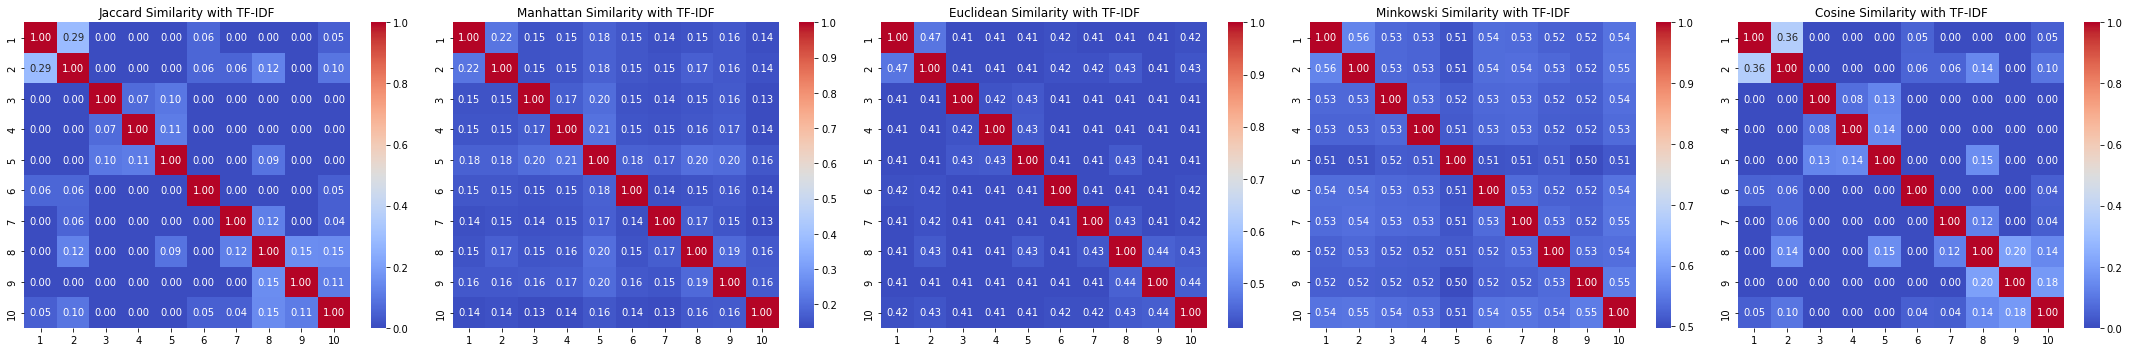

In [12]:
# Using vectorize with binary to represent TF-IDF
vectorizer = TfidfVectorizer()
tf_idf = vectorizer.fit_transform(text).toarray()

# Binarizando os vetores TF-IDF
binary_tf_idf = np.where(tf_idf > 0, 1, 0)

# Calculando a similaridade de Jaccard para vetores TF-IDF
jaccard_tf_idf = jaccard_similarity(binary_tf_idf, 'binary')

# Calculando a similaridade de Manhattan para vetores TF-IDF
manhattan_tf_idf = calculate_similarity(tf_idf, 'manhattan')

# Calculando a similaridade euclidiana para vetores TF-IDF
euclidean_tf_idf = calculate_similarity(tf_idf, 'euclidean')

# Calculando a similaridade de Minkowski para vetores TF-IDF
minkowski_tf_idf = calculate_similarity(tf_idf, 'minkowski')

# Calculando a similaridade do cosseno para vetores TF-IDF
cosine_tf_idf = calculate_similarity(tf_idf, 'cosine')

# Dados e títulos para os mapas de calor
data_heatmaps = [
    jaccard_tf_idf,
    manhattan_tf_idf,
    euclidean_tf_idf,
    minkowski_tf_idf,
    cosine_tf_idf
]

titles_heatmaps = [
    'Jaccard Similarity with TF-IDF',
    'Manhattan Similarity with TF-IDF',
    'Euclidean Similarity with TF-IDF',
    'Minkowski Similarity with TF-IDF',
    'Cosine Similarity with TF-IDF'
]

# Chamando a função para criar múltiplos mapas de calor em uma linha
create_subplot_heatmaps(data_heatmaps, titles_heatmaps, range(1, 11), range(1, 11))

### **N-Grams (2 grams)**

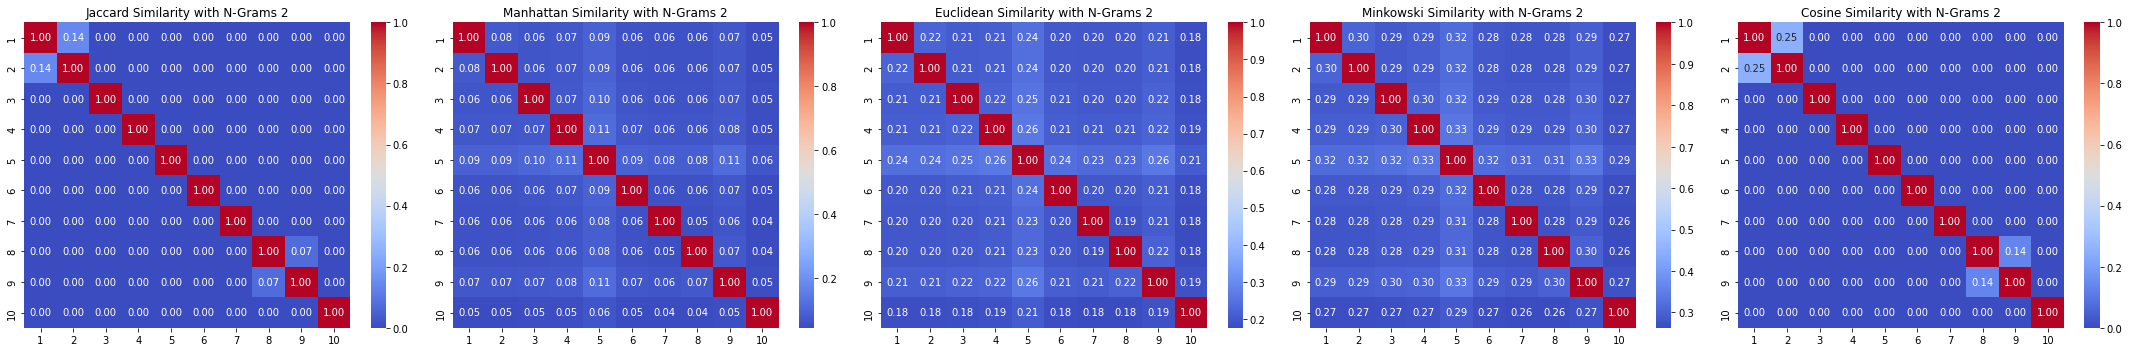

In [13]:
# Using vectorize with binary to represent N-Grams
vectorizer = CountVectorizer(ngram_range=(2, 2))
bigram_vectors = vectorizer.fit_transform(text).toarray()

# Calculando a similaridade de Jaccard para vetores N-Grams
jaccard_bigram_vectors = jaccard_similarity(bigram_vectors, 'binary')

# Calculando a similaridade de Manhattan para vetores N-Grams
manhattan_bigram_vectors = calculate_similarity(bigram_vectors, 'manhattan')

# Calculando a similaridade euclidiana para vetores N-Grams
euclidean_bigram_vectors = calculate_similarity(bigram_vectors, 'euclidean')

# Calculando a similaridade de Minkowski para vetores N-Grams
minkowski_bigram_vectors = calculate_similarity(bigram_vectors, 'minkowski')

# Calculando a similaridade do cosseno para vetores N-Grams
cosine_bigram_vectors = calculate_similarity(bigram_vectors, 'cosine')

# Dados e títulos para os mapas de calor
data_heatmaps = [
    jaccard_bigram_vectors,
    manhattan_bigram_vectors,
    euclidean_bigram_vectors,
    minkowski_bigram_vectors,
    cosine_bigram_vectors
]

titles_heatmaps = [
    'Jaccard Similarity with N-Grams 2',
    'Manhattan Similarity with N-Grams 2',
    'Euclidean Similarity with N-Grams 2',
    'Minkowski Similarity with N-Grams 2',
    'Cosine Similarity with N-Grams 2'
]

# Chamando a função para criar múltiplos mapas de calor em uma linha
create_subplot_heatmaps(data_heatmaps, titles_heatmaps, range(1, 11), range(1, 11))

### **Co-occurrence Vectors (Context Window = 1)**

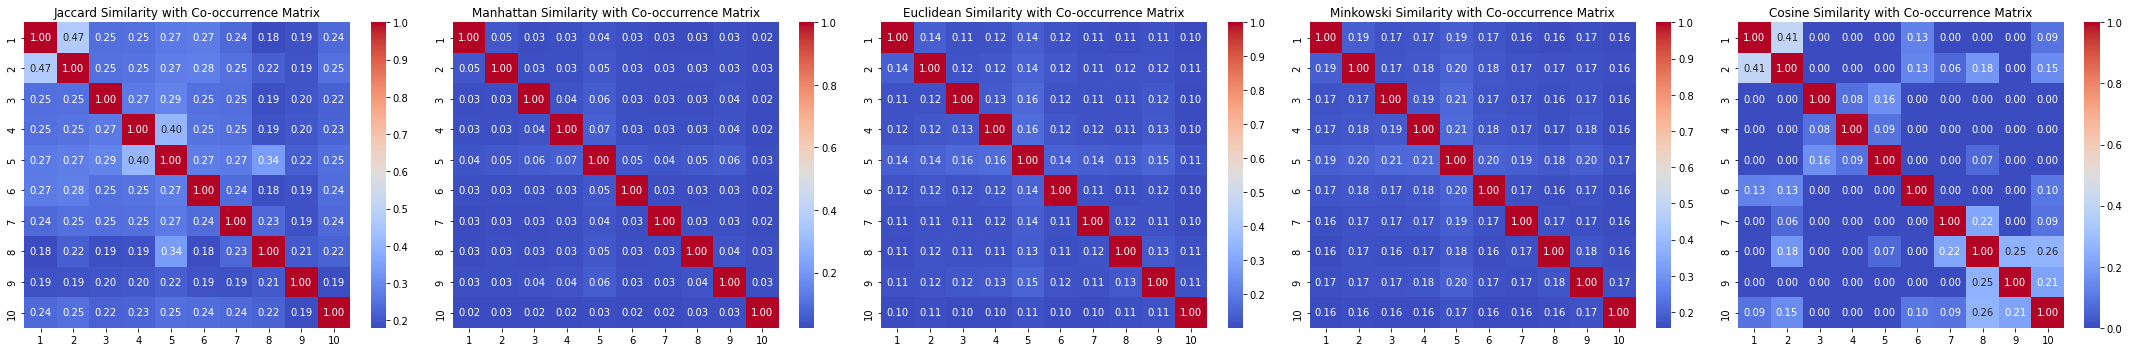

In [14]:
# Using vectorize with binary to represent Co-occurrence
co_occurrence_matrix = co_occurrence(text, 1)
co_occurrence_matrix

# Calculando a similaridade de Jaccard para vetores Co-occurrence
jaccard_co_occurrence_matrix = jaccard_similarity(co_occurrence_matrix, 'macro')

# Calculando a similaridade de Manhattan para vetores Co-occurrence
manhattan_co_occurrence_matrix = calculate_similarity(co_occurrence_matrix, 'manhattan')

# Calculando a similaridade euclidiana para vetores Co-occurrence
euclidean_co_occurrence_matrix = calculate_similarity(co_occurrence_matrix, 'euclidean')

# Calculando a similaridade de Minkowski para vetores Co-occurrence
minkowski_co_occurrence_matrix = calculate_similarity(co_occurrence_matrix, 'minkowski')

# Calculando a similaridade do cosseno para vetores Co-occurrence
cosine_co_occurrence_matrix = calculate_similarity(co_occurrence_matrix, 'cosine')

# Dados e títulos para os mapas de calor
data_heatmaps = [
    jaccard_co_occurrence_matrix,
    manhattan_co_occurrence_matrix,
    euclidean_co_occurrence_matrix,
    minkowski_co_occurrence_matrix,
    cosine_co_occurrence_matrix
]

titles_heatmaps = [
    'Jaccard Similarity with Co-occurrence Matrix',
    'Manhattan Similarity with Co-occurrence Matrix',
    'Euclidean Similarity with Co-occurrence Matrix',
    'Minkowski Similarity with Co-occurrence Matrix',
    'Cosine Similarity with Co-occurrence Matrix'
]

# Chamando a função para criar múltiplos mapas de calor em uma linha
create_subplot_heatmaps(data_heatmaps, titles_heatmaps, range(1, 11), range(1, 11))

### **Word2Vec**

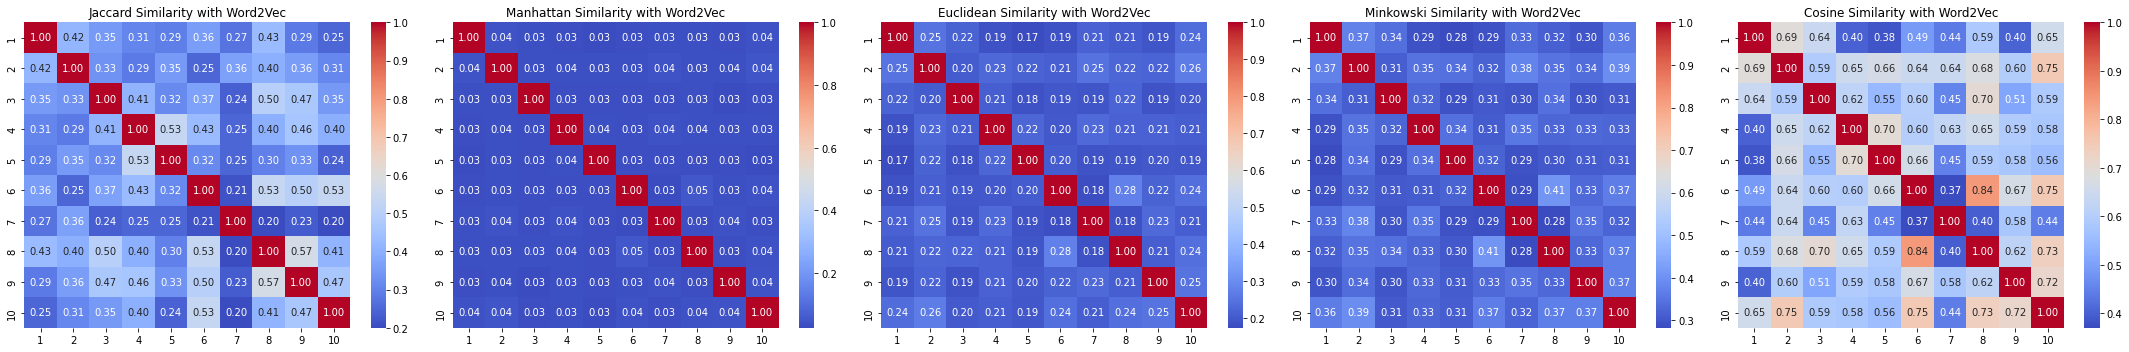

In [15]:
nlp = spacy.load('en_core_web_sm')

# Aplicando o Word2Vec
bag_vector = [nlp(sentence).vector for sentence in text]

# Escolher um limiar para binarizar os embeddings
threshold = 0.5

# binarizar o Word2Vec
binary_bag_vector = np.where(np.array(bag_vector) > threshold, 1, 0)

# Calculando a similaridade de Jaccard para vetores N-Grams
jaccard_bag_vector = jaccard_similarity(binary_bag_vector, 'binary')

# Calculando a similaridade de Manhattan para vetores N-Grams
manhattan_bag_vector = calculate_similarity(bag_vector, 'manhattan')

# Calculando a similaridade euclidiana para vetores N-Grams
euclidean_bag_vector = calculate_similarity(bag_vector, 'euclidean')

# Calculando a similaridade de Minkowski para vetores N-Grams
minkowski_bag_vector = calculate_similarity(bag_vector, 'minkowski')

# Calculando a similaridade do cosseno para vetores N-Grams
cosine_bag_vector = calculate_similarity(bag_vector, 'cosine')

# Dados e títulos para os mapas de calor
data_heatmaps = [
    jaccard_bag_vector,
    manhattan_bag_vector,
    euclidean_bag_vector,
    minkowski_bag_vector,
    cosine_bag_vector
]

titles_heatmaps = [
    'Jaccard Similarity with Word2Vec',
    'Manhattan Similarity with Word2Vec',
    'Euclidean Similarity with Word2Vec',
    'Minkowski Similarity with Word2Vec',
    'Cosine Similarity with Word2Vec'
]

# Chamando a função para criar múltiplos mapas de calor em uma linha
create_subplot_heatmaps(data_heatmaps, titles_heatmaps, range(1, 11), range(1, 11))